# Temperature graph with inset of relevant region

This example demonstrates the use of a single 3D data cube with time, latitude and longitude dimensions to plot a temperature series for a single latitude coordinate, with an inset plot of the data region.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import iris
import cartopy.crs as ccrs
import iris.quickplot as qplt
import iris.plot as iplt

In [1]:
import iris

cube = iris.load_cube(iris.sample_data_path('ostia_monthly.nc'))
cube

<iris 'Cube' of surface_temperature / (K) (time: 54; latitude: 18; longitude: 432)>

Slice into cube to retrieve data for the inset map showing the data region

In [2]:
region = cube[-1,...]
region

<iris 'Cube' of surface_temperature / (K) (latitude: 18; longitude: 432)>

Average over latitude to reduce cube to 1 dimension

In [3]:
plot_line = region.collapsed('latitude', iris.analysis.MEAN)
plot_line

/opt/conda/lib/python3.6/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/conda/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))


Surface Temperature (K),longitude
Shape,432
Dimension coordinates,
longitude,x
Scalar coordinates,
forecast_period,0 hours
forecast_reference_time,"2010-09-16 12:00:00, bound=(2010-09-02 00:00:00, 2010-10-01 00:00:00)"
latitude,"-0.277771 degrees, bound=(-4.9999924, 4.4444504) degrees"
time,"2010-09-16 00:00:00, bound=(2010-09-01 00:00:00, 2010-10-01 00:00:00)"
Attributes,
Conventions,CF-1.5


Add a single subplot (axes). Could also use `ax_main = plt.subplot()`.

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax_main = fig.add_subplot(1, 1, 1);
fig

<Figure size 1200x800 with 1 Axes>

Produce a quick plot of the 1D cube

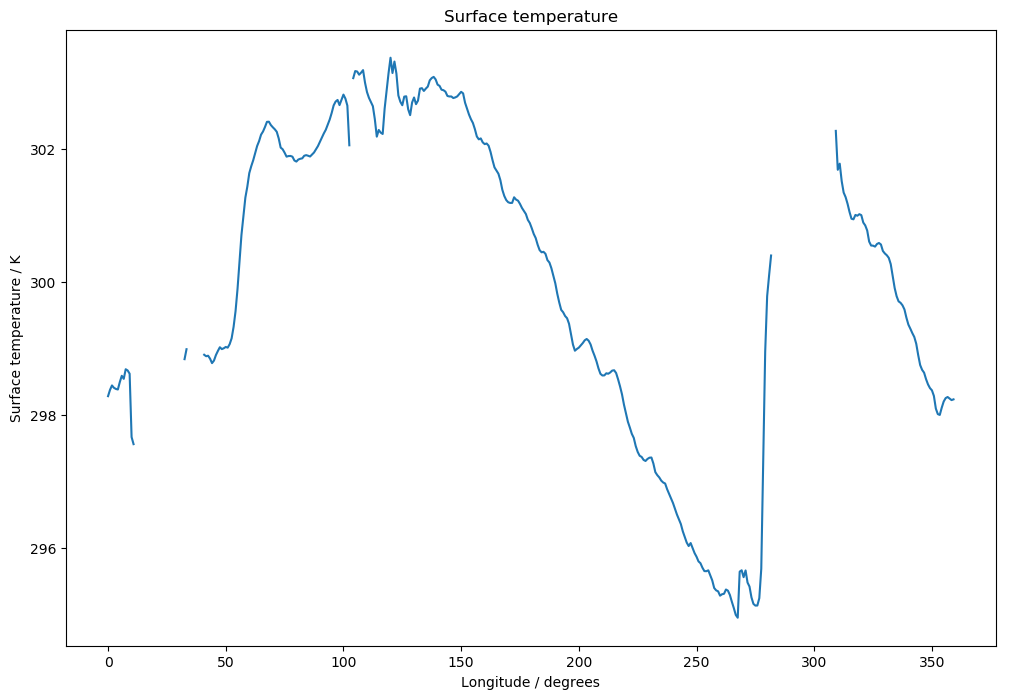

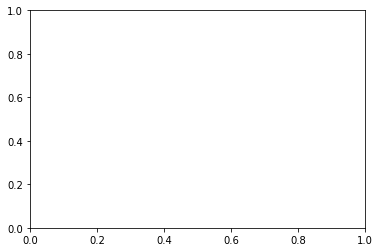

In [5]:
import iris.quickplot as qplt

qplt.plot(plot_line, axes=ax_main)
fig

Adjust x limits to match the data.  
Because we supplied our initial axes object, the limits are not automatically scaled, and are at their defaults of 0, 0

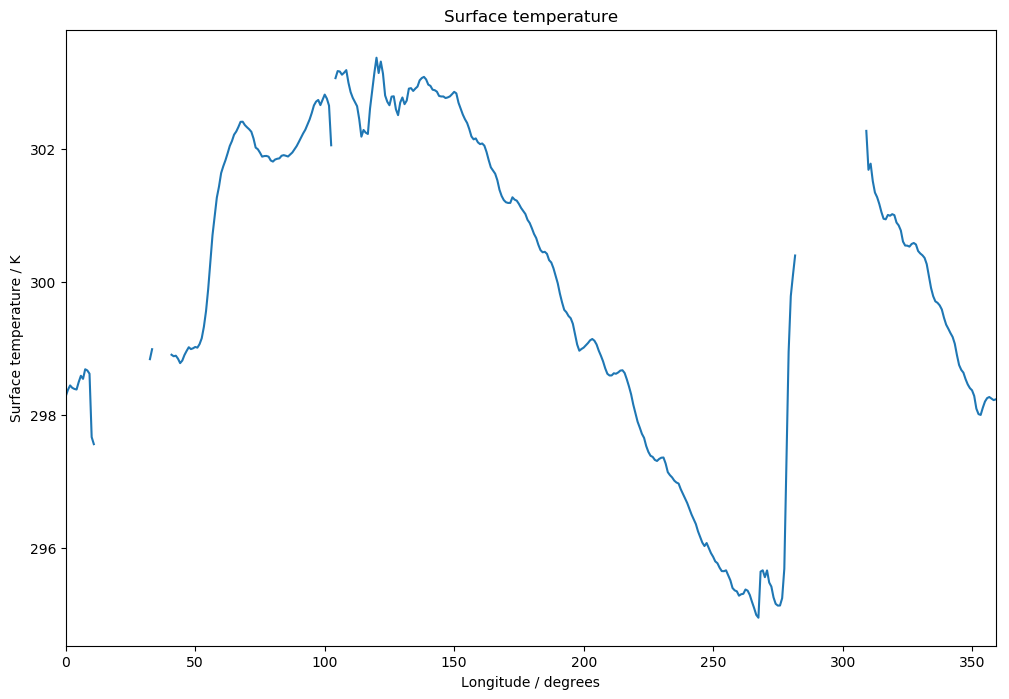

In [6]:
ax_main.set_xlim(0, plot_line.coord('longitude').points.max())
fig

Adjust the y limits so that the inset map won't clash with main plot

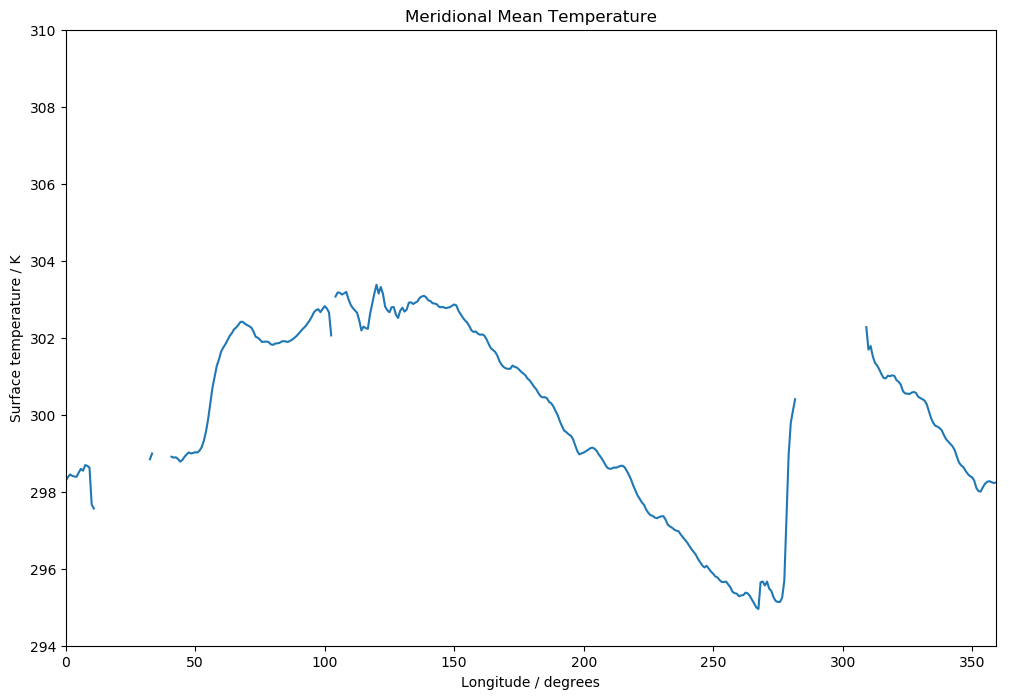

In [7]:
ax_main.set_ylim(294, 310)
ax_main.set_title('Meridional Mean Temperature')
fig

Add grid lines

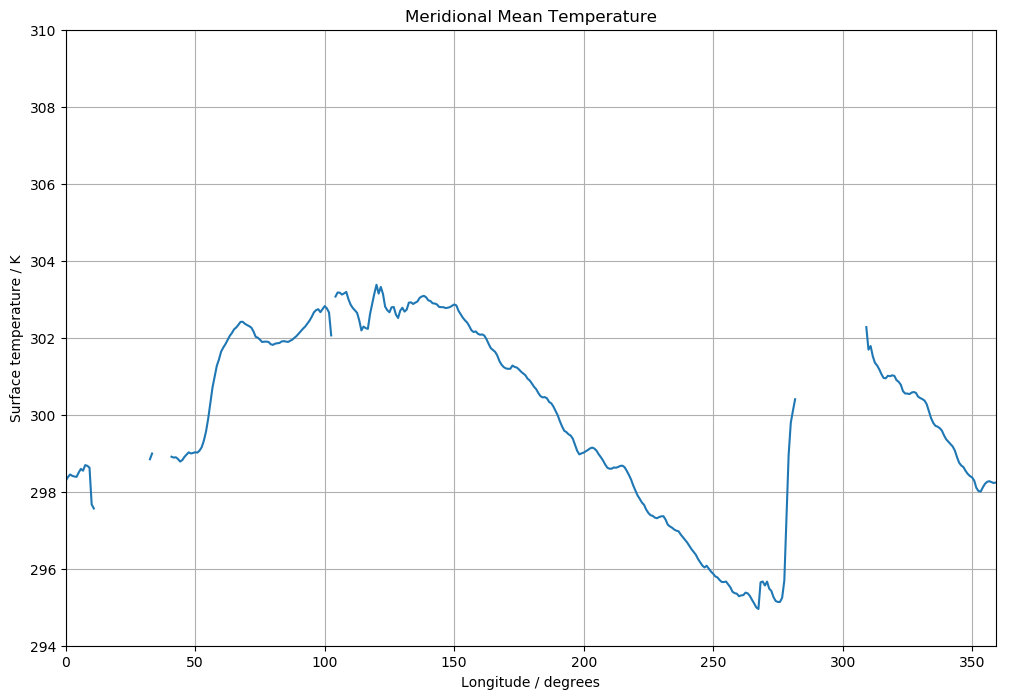

In [8]:
ax_main.grid()
fig

Add a second set of axes specifying the fractional coordinates within the figure with bottom left corner at x=0.55, y=0.58 with width 0.3 and height 0.25. 

We also specify the projection, the coast lines, and ask for the global area to be displayed. The latter prevents the figure form just showing the selection of interest, i.e., the small strip along the equator.

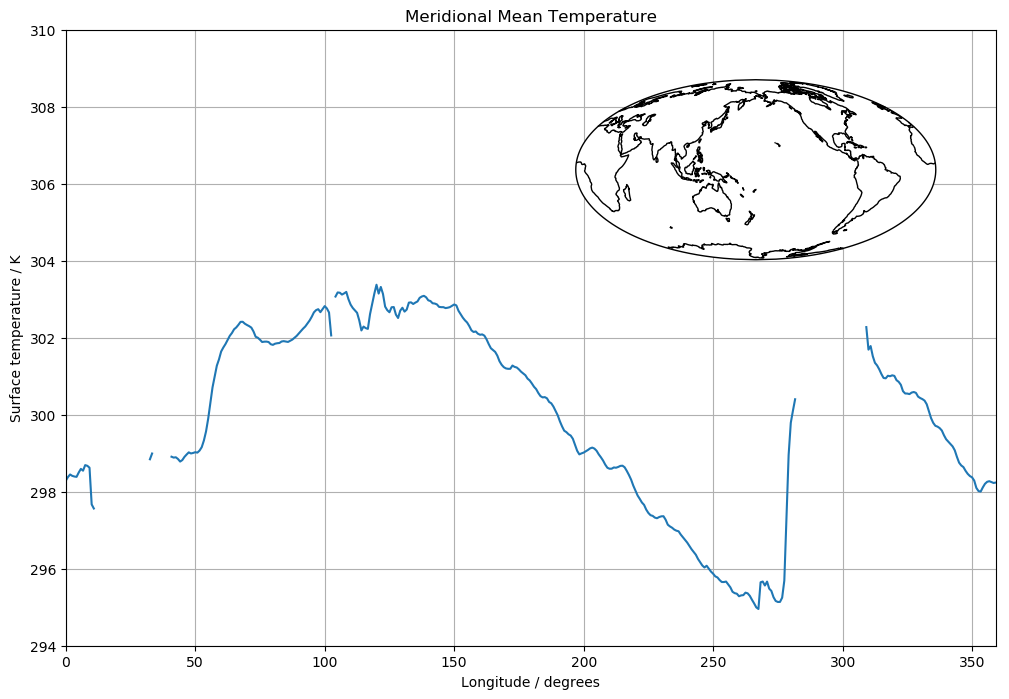

In [9]:
import cartopy.crs as ccrs
import iris.plot as iplt

ax_sub = fig.add_axes([0.55, 0.58, 0.3, 0.25],
                      projection=ccrs.Mollweide(central_longitude=180))
ax_sub.set_global()
ax_sub.coastlines()

fig

Use iris.plot (iplt) here so colour bar properties can be specified.
Also use a sequential colour scheme to reduce confusion for those with colour-blindness

/opt/conda/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/opt/conda/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


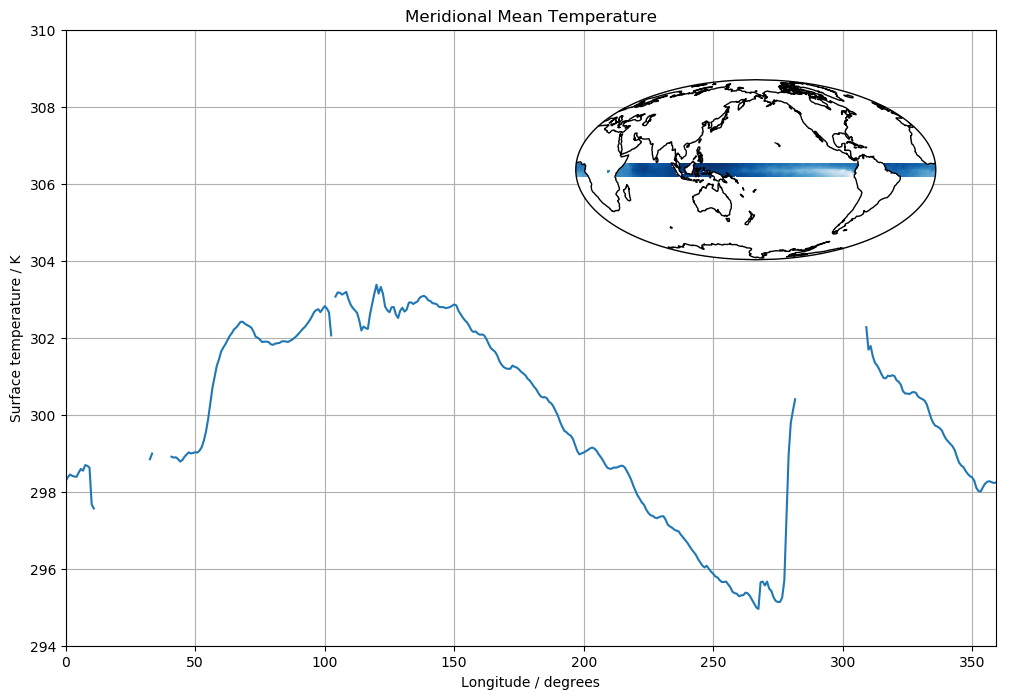

In [10]:
import iris.plot as iplt

image = iplt.pcolormesh(region, cmap='Blues', axes=ax_sub)
fig

Manually set the orientation and tick marks on your colour bar. We specify the `image` variable as input to the colour bar: this is the color mesh we created before.

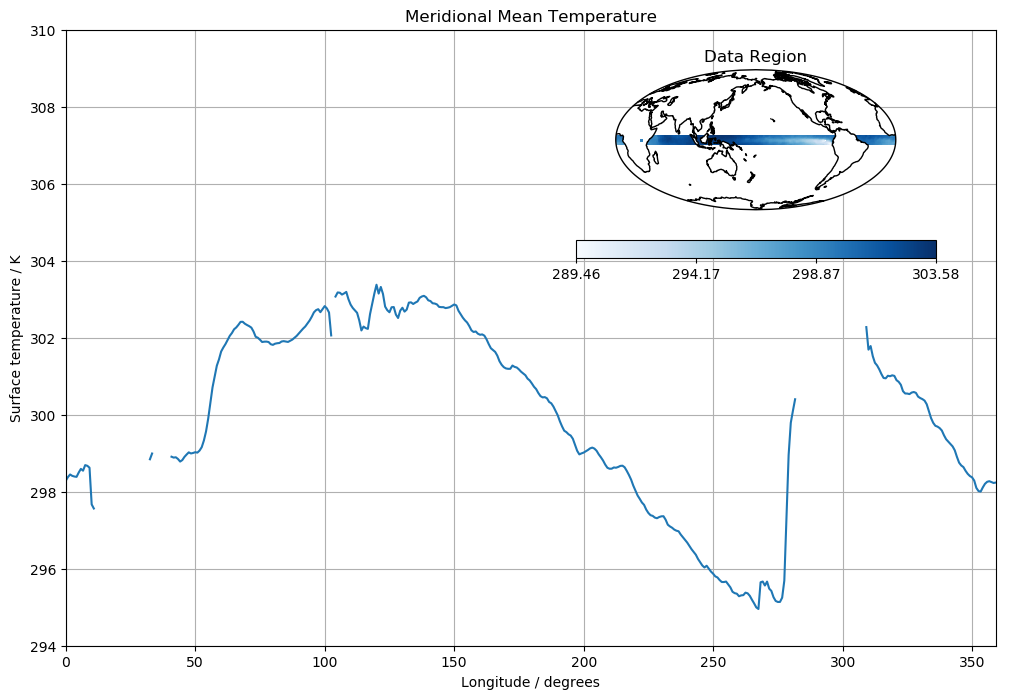

In [11]:
import numpy as np

ticklist = np.linspace(np.min(region.data), np.max(region.data), 4)
fig.colorbar(image, orientation='horizontal', ticks=ticklist)
ax_sub.set_title('Data Region')
fig